# Analyzing Gun Deaths in the US: 2013
### by Lucy Murray

# 1. Introduction

This is cleaned CDC data about [Gun Deaths in America](https://www.kaggle.com/hakabuk/gun-deaths-in-the-us). For this project, I am interested in further cleaning the data, subsetting the dataframe, and selecting specific features. I will use this information to show graphs using the Matplotlib package. And finally, I will use nonparametric inference using bootstrap simulation.

Because this is a large dataset with over 10,000 entries, I decided to limit my analysis to guns deaths in the United States during the year 2013. This year also appears to contain the most rows. For this project, I posed the following questions:
1. What is the freuqency of gun deaths by intent and race in 2013?
2. What is the distribution of ages of gun deaths in 2013?
3. What is the distribution of ages of gun deaths by race and age in 2013? 

In [47]:
# install pandas_profiling package
# pip install pandas-profiling

In [53]:
## import packages:
%matplotlib inline
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
from scipy import stats #  library of statistical functions
import scipy.interpolate as interp #  library for interpolating arrays
import pandas_profiling


# Set seed for generating psuedo random numbers
np.random.seed(123)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

### Reading the Data

In [45]:
# reading the data into a dataframe using pandas
guns = pd.read_csv("guns.csv")

In [46]:
# checking the packaging
guns.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


# 2. Preparing and Wrangling the Data

### Observing the Structure

Before cleaning the data, I want to observe some of the features of the data set.

In [3]:
# observing the datatypes of the dataset
guns.dtypes

Unnamed: 0      int64
year            int64
month           int64
intent         object
police          int64
sex            object
age           float64
race           object
hispanic        int64
place          object
education     float64
dtype: object

In [4]:
# observing the unique values of the 'intent' column
guns.intent.unique()

array(['Suicide', 'Undetermined', 'Accidental', 'Homicide', nan],
      dtype=object)

In [5]:
# observing the unique values of the 'race' column
guns.race.unique()

array(['Asian/Pacific Islander', 'White',
       'Native American/Native Alaskan', 'Black', 'Hispanic'],
      dtype=object)

In [6]:
# observing the unique values of the 'place' column
guns.place.unique()

array(['Home', 'Street', 'Other specified', nan, 'Other unspecified',
       'Trade/service area', 'Farm', 'Industrial/construction',
       'School/instiution', 'Sports', 'Residential institution'],
      dtype=object)

In [7]:
# looking at the unique value count for intent
guns.intent.value_counts()

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

In [20]:
# looking at the unique value count for year
guns.year.value_counts()

2013    33636
2014    33599
2012    33563
Name: year, dtype: int64

### Summarizing the Dataframe

In [8]:
print(guns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 11 columns):
Unnamed: 0    100798 non-null int64
year          100798 non-null int64
month         100798 non-null int64
intent        100797 non-null object
police        100798 non-null int64
sex           100798 non-null object
age           100780 non-null float64
race          100798 non-null object
hispanic      100798 non-null int64
place         99414 non-null object
education     100745 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 8.5+ MB
None


In [9]:
guns.describe()

,Unnamed: 0,year,month,police,age,hispanic,education
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


The pandas_profiling package can be used to look at the profile report, however it takes a long time to load so it is commented out of this project.

In [10]:
# looking at the pandas profile report
# guns.profile_report(style={'full_width':True})

### Removing NAs and Subsetting the Data

In [11]:
# removing rows with NA in the documentation
guns_modified = guns.dropna()

In [12]:
# removing the hispanic column
guns_modified = guns_modified.drop(columns=['hispanic'])

In [13]:
guns_modified = guns_modified[guns_modified.year == 2013]

In [14]:
guns_modified.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,place,education
33563,33564,2013,1,Accidental,0,M,33.0,White,Home,3.0
33564,33565,2013,1,Suicide,0,M,37.0,Native American/Native Alaskan,Home,2.0
33565,33566,2013,1,Suicide,0,M,38.0,Native American/Native Alaskan,Home,2.0
33566,33567,2013,1,Suicide,0,M,27.0,Native American/Native Alaskan,Home,3.0
33567,33568,2013,1,Suicide,0,M,22.0,Native American/Native Alaskan,Home,2.0


In [15]:
print(guns_modified.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33146 entries, 33563 to 67198
Data columns (total 10 columns):
Unnamed: 0    33146 non-null int64
year          33146 non-null int64
month         33146 non-null int64
intent        33146 non-null object
police        33146 non-null int64
sex           33146 non-null object
age           33146 non-null float64
race          33146 non-null object
place         33146 non-null object
education     33146 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.8+ MB
None


In [16]:
guns_modified.describe()

,Unnamed: 0,year,month,police,age,education
count,33146.000000,33146.0,33146.000000,33146.000000,33146.000000,33146.000000
mean,50404.082453,2013.0,6.532402,0.000211,44.029415,2.305738
std,9697.063004,0.0,3.416799,0.014531,19.464907,0.988204
min,33564.000000,2013.0,1.000000,0.000000,0.000000,1.000000
25%,42023.250000,2013.0,4.000000,0.000000,27.000000,2.000000
50%,50423.500000,2013.0,7.000000,0.000000,42.000000,2.000000
75%,58799.750000,2013.0,9.000000,0.000000,58.000000,3.000000
max,67199.000000,2013.0,12.000000,1.000000,107.000000,5.000000


# 3. Visualizing the Data

Utilizing visualizations, I can answer the posted questions:

1. What is the frequency of gun deaths by intent and race in 2013?
2. What is the distribution of ages of gun deaths in 2013?
3. What is the distribution of ages of gun deaths by race and age in 2013? 

### Visualizing Frequency of Gun Deaths by Intent and Race

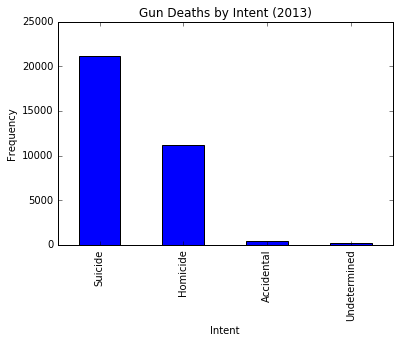

In [50]:
# bar plot by intent
gun_intent = guns_modified['intent'].value_counts().plot(kind='bar',
                                    title="Gun Deaths by Intent (2013)")
gun_intent.set_xlabel("Intent")
gun_intent.set_ylabel("Frequency")
plt.show()

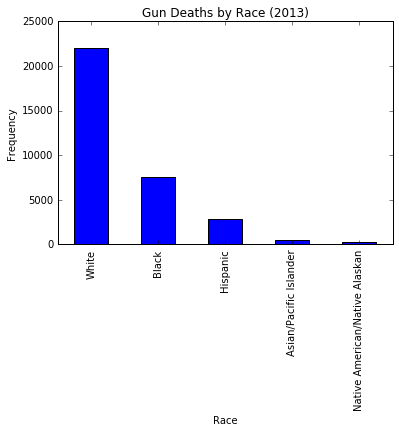

In [51]:
# bar plot by race
gun_race = guns_modified['race'].value_counts().plot(kind='bar',
                                    title="Gun Deaths by Race (2013)")
gun_race.set_xlabel("Race")
gun_race.set_ylabel("Frequency")
plt.show()

### Visualizing Age of Gun Deaths

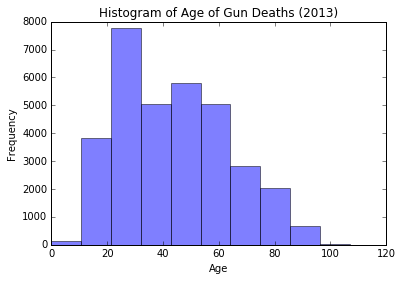

In [34]:
# histogram by age
x = guns_modified['age']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(r'Histogram of Age of Gun Deaths (2013)')
plt.show()

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


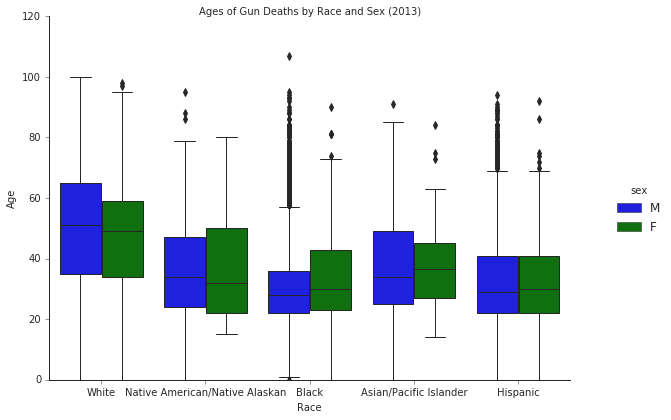

In [92]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("race", "age", "sex", data=guns_modified, kind="box")
    g.set_axis_labels("Race", "Age")
    g.fig.suptitle("Ages of Gun Deaths by Race and Sex (2013)")
    g.fig.set_figheight(6)
    g.fig.set_figwidth(10)

# 5. Simulation of nonparametric inference of the Median for a quantitive variable

The guide by the [Analytics Vidhya Team](https://www.analyticsvidhya.com/blog/2017/11/a-guide-to-conduct-analysis-using-non-parametric-tests/) and the article ["How to Calculate Nonparametric Statistical Hypothesis Tests in Python
"](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/) by Jason Brownlee explains that non-parametric tests are used when there is limited or no information available about the population parameters, thus there are no assumptions about the distribution of data.

### Kruskal-Wallis Test

This test is used when dealing with more than 2 independent groups by comparing the median among k populations and determining whether or not there is a difference in distributions. For the following hypothesis, I have selected 5% level of significance:

* Null hypthesis ($H_{0}$): There is no sigificant difference between the medians of three independent samples of age from the population of gun deaths.
* Alternative hypthesis ($H_{1}$): There is a sigificant difference between the medians of three independent samples of age from the population of gun deaths.

In [59]:
guns_modified.age.median()

42.0

Rcall the previous histogram of age of gun deaths:

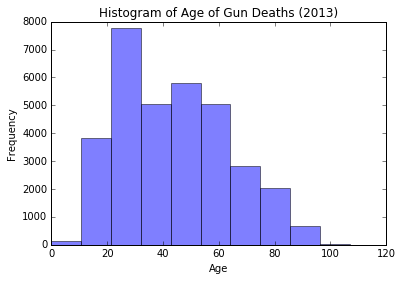

In [58]:
# histogram by age
x = guns_modified['age']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(r'Histogram of Age of Gun Deaths (2013)')
plt.show()

Because the population is 33,146 values, an appropriate sample size is 3,300 values, which is about 10 percent of the data. I will use this number to create three random samples of the median of the age of the population of gun deaths.

In [70]:
data_sample = guns_modified.age[np.random.choice(guns_modified.age.index, 3300)]
data_sample.median()

42.0

In [71]:
resample_1 = data_sample.sample(3300, replace=True)
resample_1.median()

41.0

In [72]:
resample_2 = data_sample.sample(3300, replace=True)
resample_2.median()

41.0

In [73]:
type(data_sample)

pandas.core.series.Series

In [74]:
#np.random.seed(111)
resamples_medians = pd.Series(index = np.arange(33000))
for i in range(33000):
    resamples_medians[i] = data_sample.sample(3300, replace=True).median()
    
print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))

42.0
41.81181818181818
40.5
43.0


In [75]:
data_sample.median()

42.0

In [76]:
conf_int = np.percentile(resamples_medians, [2.5, 97.5]) # The middle 95% interval
conf_int

# can check quantiles using np.percentile
# shows on x-axis 2.5 percent of the area
# whole area adds up 1
# 100 percent area under the curve

array([40.5, 43. ])

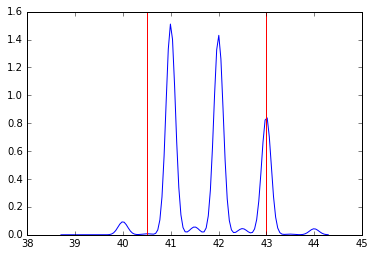

In [77]:
sns.kdeplot(resamples_medians)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')
# np.percentile gives two numbers that represent the lower and upper intervals
# for the first loop of the for loop, plot the red vertical line at 40.5
# for the second loop, plot the red verticle line at 43.0

In order to test our random sample medians for significance, I need to calculate the test statistic, H. The [kruskal()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) function can find H and the p-value to determine if the results are statistically significant.

In [82]:
# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

# seed the random number generator
seed(1)

# we can use the same samples we generated before to compare
stat, p = kruskal(data_sample , resample_1 , resample_2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject null hypothesis)')
else:
	print('Different distributions (reject null hypothesis)')

Statistics=0.112, p=0.946
Same distributions (fail to reject null hypothesis)


# 6. Conclusion

I examined the gun deaths that occurred in America during the year 2013, utilizing cleaned data from the CDC.

* I observed that the frequency of gun deaths by intent and race in 2013 utilizing barplot visualizations. I found that suicide was the intent of gun deaths most often, while accidental and undetermined were the intent least often. Further, I found that race of people by gun deaths had the highest frequency of white people, while Native American/Alaskan people died by gun deaths least often.

* The distribution of ages of gun deaths in 2013 looked approximately normal, according to the histogram.

* The boxplots of ages of gun deaths in 2013 by race and sex generally had overlapping boxes and somewhat similar center lines, indicating similar interquartile ranges and medians, respectively. The exception is that both men and women in the white race category had a higher median than other races. The whiskers of the boxplots had varying lengths, indicating a wide variation of age range among the data. Indicative by the dots outside of the whiskers, black and hispanic had more outliers of age than other races for gun deaths.

* According to the Kruskal-Wallis Test that was performed, the null hypothesis is accepted and there is no sigificant difference between the medians of three independent samples of age from the population of gun deaths.